## Memanggil Library

In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt


Bad key text.latex.unicode in file C:\Users\ITD-STU\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\ITD-STU\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\ITD-STU\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplo

## Memanggil Dataset

Memanggil data1 yang berisi combined_data_1

In [2]:
data1 = pd.read_csv('E:/mata kuliah/Tingkat 4/Sem 7/DAMI/projek/data proyek/dataproyek/combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
data1['Rating'] = data1['Rating'].astype(float)
print('Data1 shape: {}'.format(data1.shape))
print(data1.iloc[::5000000, :])

Data1 shape: (24058263, 2)
          Cust_Id  Rating
0              1:     NaN
5000000   2560324     4.0
10000000  2271935     2.0
15000000  1921803     2.0
20000000  1933327     3.0


Memanggil data2 yang berisi combined_data_2

In [3]:
data2 = pd.read_csv('E:/mata kuliah/Tingkat 4/Sem 7/DAMI/projek/data proyek/dataproyek/combined_data_2.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
data2['Rating'] = data2['Rating'].astype(float)
print('Data2 shape: {}'.format(data2.shape))
print(data2.iloc[::5000000, :])

Data2 shape: (26982302, 2)
          Cust_Id  Rating
0           4500:     NaN
5000000    485565     2.0
10000000  1155911     2.0
15000000   121369     3.0
20000000  1277779     3.0
25000000   252632     5.0


Memanggil data3 yang berisi combined_data_3

In [4]:
data3 = pd.read_csv('E:/mata kuliah/Tingkat 4/Sem 7/DAMI/projek/data proyek/dataproyek/combined_data_3.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
data3['Rating'] = data3['Rating'].astype(float)
print('Data3 shape: {}'.format(data3.shape))
print(data3.iloc[::5000000, :])

Data3 shape: (22605786, 2)
          Cust_Id  Rating
0           9211:     NaN
5000000   2071383     4.0
10000000  2485184     5.0
15000000   765311     2.0
20000000  1260161     3.0


Memanggil data4 yang berisi combined_data_4

In [5]:
data4 = pd.read_csv('E:/mata kuliah/Tingkat 4/Sem 7/DAMI/projek/data proyek/dataproyek/combined_data_4.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
data4['Rating'] = data4['Rating'].astype(float)
print('Data4 shape: {}'.format(data4.shape))
print(data4.iloc[::5000000, :])

Data4 shape: (26851926, 2)
          Cust_Id  Rating
0          13368:     NaN
5000000    605496     5.0
10000000   285173     5.0
15000000   604335     5.0
20000000  2503632     5.0
25000000   470744     3.0


## Merge Dataset

Merge dataset data_combined_1 hingga data_combined_4

In [6]:
merge_dataset = data1
merge_dataset.index = np.arange(0,len(merge_dataset))
print('merge dataset shape: {}'.format(merge_dataset.shape))
print(merge_dataset.iloc[::5000000, :])

merge dataset shape: (24058263, 2)
          Cust_Id  Rating
0              1:     NaN
5000000   2560324     4.0
10000000  2271935     2.0
15000000  1921803     2.0
20000000  1933327     3.0


Mencari jumlah movies, customer, dan ratings

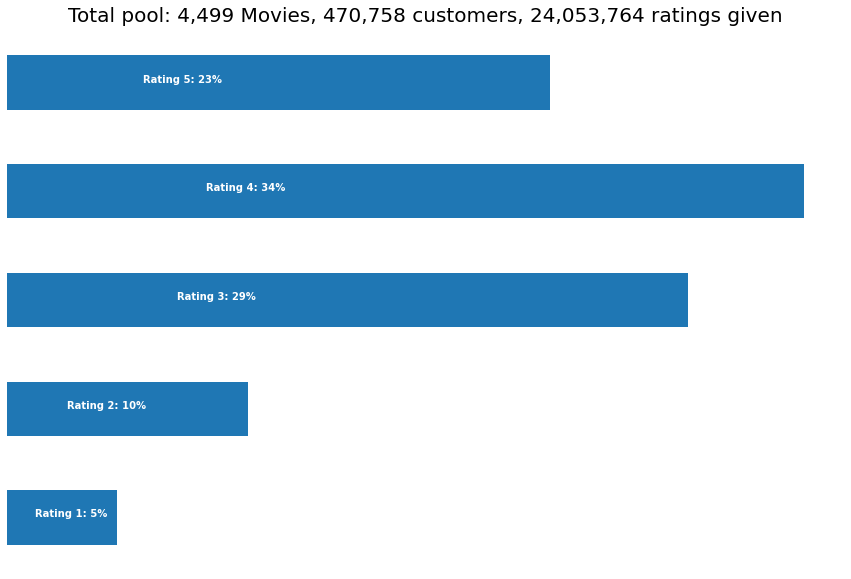

In [7]:
p = merge_dataset.groupby('Rating')['Rating'].agg(['count'])

movie_count = merge_dataset.isnull().sum()[1]

cust_count = merge_dataset['Cust_Id'].nunique() - movie_count

rating_count = merge_dataset['Cust_Id'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')
            

## Data Cleaning

In [8]:
merge_dataset_nan = pd.DataFrame(pd.isnull(merge_dataset.Rating))
merge_dataset_nan = merge_dataset_nan[merge_dataset_nan['Rating'] == True]
merge_dataset_nan = merge_dataset_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(merge_dataset_nan['index'][1:],merge_dataset_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(merge_dataset) - merge_dataset_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [9]:
merge_dataset = merge_dataset[pd.notnull(merge_dataset['Rating'])]
merge_dataset['Movie_Id'] = movie_np.astype(int)
merge_dataset['Cust_Id'] = merge_dataset['Cust_Id'].astype(int)
print(merge_dataset.iloc[::5000000, :])

C:\Users\ITD-STU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


C:\Users\ITD-STU\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
f = ['count','mean']
merge_dataset_movie_summary = merge_dataset.groupby('Movie_Id')['Rating'].agg(f)
merge_dataset_movie_summary.index = merge_dataset_movie_summary.index.map(int)
movie_benchmark = round(merge_dataset_movie_summary['count'].quantile(0.7),0)
drop_movie_list = merge_dataset_movie_summary[merge_dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

merge_dataset_cust_summary = merge_dataset.groupby('Cust_Id')['Rating'].agg(f)
merge_dataset_cust_summary.index = merge_dataset_cust_summary.index.map(int)
cust_benchmark = round(merge_dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = merge_dataset_cust_summary[merge_dataset_cust_summary['count'] < cust_benchmark].index

print('Customer minimum times of review: {}'.format(cust_benchmark))

Movie minimum times of review: 1799.0
Customer minimum times of review: 52.0


In [11]:
merge_dataset = merge_dataset[~merge_dataset['Movie_Id'].isin(drop_movie_list)]
merge_dataset = merge_dataset[~merge_dataset['Cust_Id'].isin(drop_cust_list)]
print(merge_dataset.iloc[::5000000, :])

          Cust_Id  Rating  Movie_Id
696        712664     5.0         3
6932490   1299309     5.0      1384
13860273   400155     3.0      2660
20766530   466962     4.0      3923


In [12]:
merge_dataset_p = pd.pivot_table(merge_dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(merge_dataset_p.shape)

(143458, 1350)


## Data Mapping

In [13]:
merge_dataset_title = pd.read_csv('E:/mata kuliah/Tingkat 4/Sem 7/DAMI/projek/data proyek/dataproyek/movie_titles.csv', encoding='ISO-8859-1')
merge_dataset_title.head(10)

,1,2003,Dinosaur Planet,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2,2004.0,Isle of Man TT 2004 Review,NaN,NaN,NaN
1,3,1997.0,Character,NaN,NaN,NaN
2,4,1994.0,Paula Abdul's Get Up & Dance,NaN,NaN,NaN
3,5,2004.0,The Rise and Fall of ECW,NaN,NaN,NaN
4,6,1997.0,Sick,NaN,NaN,NaN
5,7,1992.0,8 Man,NaN,NaN,NaN
6,8,2004.0,What the #$*! Do We Know!?,NaN,NaN,NaN
7,9,1991.0,Class of Nuke 'Em High 2,NaN,NaN,NaN
8,10,2001.0,Fighter,NaN,NaN,NaN
9,11,1999.0,Full Frame: Documentary Shorts,NaN,NaN,NaN


In [14]:
merge_dataset_title = pd.read_csv('movie_titles.csv', encoding='ISO-8859-1')
columns = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']
merge_dataset_title.drop(columns, inplace=True, axis=1)
merge_dataset_title.columns = ['movie_id', 'year', 'name']
merge_dataset_title.head(10)

,movie_id,year,name
0,2,2004.0,Isle of Man TT 2004 Review
1,3,1997.0,Character
2,4,1994.0,Paula Abdul's Get Up & Dance
3,5,2004.0,The Rise and Fall of ECW
4,6,1997.0,Sick
5,7,1992.0,8 Man
6,8,2004.0,What the #$*! Do We Know!?
7,9,1991.0,Class of Nuke 'Em High 2
8,10,2001.0,Fighter
9,11,1999.0,Full Frame: Documentary Shorts


## Info Data

In [15]:
print("Total Data:")
print("Total number of movie ratings = "+str(merge_dataset.shape[0]))
print("Number of unique users = "+str(len(np.unique(merge_dataset["Cust_Id"]))))
print("Number of unique movies = "+str(len(np.unique(merge_dataset["Movie_Id"]))))

Total Data:
Total number of movie ratings = 17337458
Number of unique users = 143458
Number of unique movies = 1350


In [16]:
merge_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17337458 entries, 696 to 24056846
Data columns (total 3 columns):
Cust_Id     int32
Rating      float64
Movie_Id    int32
dtypes: float64(1), int32(2)
memory usage: 396.8 MB


In [17]:
merge_dataset.describe()

,Cust_Id,Rating,Movie_Id
count,1.733746e+07,1.733746e+07,1.733746e+07
mean,1.321158e+06,3.590570e+00,2.302783e+03
std,7.646923e+05,1.062665e+00,1.303458e+03
min,6.000000e+00,1.000000e+00,3.000000e+00
25%,6.602280e+05,3.000000e+00,1.176000e+03
50%,1.316775e+06,4.000000e+00,2.342000e+03
75%,1.983213e+06,4.000000e+00,3.433000e+03
max,2.649429e+06,5.000000e+00,4.496000e+03


Melihat data yang null

In [18]:
merge_dataset.isna().sum()

Cust_Id     0
Rating      0
Movie_Id    0
dtype: int64

## Implementing Apriori Algorithm

In [21]:
#import library
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#mlxtend melakukan import fungsi apriori dan association_rules

In [24]:
# Merancang kondisi yang mengindikasi movie dengan rating terpopular

In [31]:
merge_dataset["Populer"] = merge_dataset["Rating"] > 3
merge_dataset[10:15]

merge_dataset[merge_dataset["Cust_Id"] == 1][:5]

,Cust_Id,Rating,Movie_Id,Populer


In [53]:
merge_dataset.head()

,Cust_Id,Rating,Movie_Id,Populer
696,712664,5.0,3,True
697,1331154,4.0,3,True
698,2632461,3.0,3,False
699,44937,5.0,3,True
700,656399,4.0,3,True


In [54]:
# Menampilkan movie yang popular

In [55]:
popular_movie = merge_dataset[merge_dataset["Populer"]]
popular_movie.head()

,Cust_Id,Rating,Movie_Id,Populer
696,712664,5.0,3,True
697,1331154,4.0,3,True
699,44937,5.0,3,True
700,656399,4.0,3,True
704,2031561,4.0,3,True


In [56]:
# Memasukkan movie yang dikomentari pengguna ke dalam collection
# frozenset Freeze collection

In [57]:
favor_reviews_by_customers = dict((k, frozenset(v.values)) for k, v in popular_movie.groupby("Cust_Id")["Movie_Id"])


In [65]:
# Menghitung jumlah rekomendasi film

In [58]:
num_favor_reviews_by_customers = popular_movie[["Movie_Id", "Populer"]].groupby("Movie_Id").sum()

In [64]:
#mengurutkan movie berdasarkan kolom populer
num_favor_reviews_by_customers.sort_values(by="Populer", ascending=False).head()

,Populer
Movie_Id,
1905,92250.0
2452,88766.0
4306,88308.0
3962,82238.0
2862,81781.0


In [67]:
# Membuat initial frequent itemset

In [68]:
from collections import defaultdict
import sys
def find_frequent_itemsets(favor_reviews_by_customers ,k_itemsets,min_support):
    counts = defaultdict(int)
  
    for user,review in favor_reviews_by_customers.items():
      
        for itemset in k_itemsets:
            if itemset.issubset(review):
                for other_reviewed_movie in review-itemset:
                    current_superset = itemset|frozenset((other_reviewed_movie,))
                    counts[current_superset] += 1
    return dict([(itemset,frequence) for itemset,frequence in counts.items() if frequence >= min_support])


In [88]:
frequent_itemsets={}

In [89]:
min_support = 50

In [90]:
frequent_itemsets = {} 
min_support = 50

# Frequent item dengan length 1
frequent_itemsets[1] = dict((frozenset((Movie_Id,)), row["Populer"])
                                for Movie_Id, row in num_favor_reviews_by_customers.iterrows()
                                if row["Populer"] > min_support)

print("Terdapat {} movies dengan lebih dari {} favorable reviews".format(len(frequent_itemsets[1]), min_support))
sys.stdout.flush()

Terdapat 1350 movies dengan lebih dari 50 favorable reviews
